In [1]:
%load_ext jupyternotify
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [2]:
import hgcdte

In [3]:
xs = [0.0, 0.0001, 5., 5.0001, 20.]
ys = [0.65, 0.1,   0.1,  0.65,   0.65]

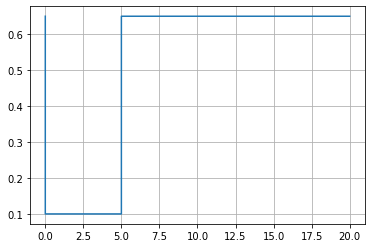

In [4]:
plt.plot(xs, ys)
plt.grid()

In [5]:
rot = hgcdte.rotator(hkl = [0, 1, 3])
mod = hgcdte.model(xs, ys)

[ 1.57079633  1.24904577 -1.57079633]


In [6]:
hcr = hgcdte.hcore(mod, 41, rot = rot)

In [7]:
size = 20
kss = np.linspace(-1., 1., size)

In [8]:
kx, ky = np.meshgrid(np.copy(kss), np.copy(kss))

In [9]:
spec = np.vectorize(lambda x, y: hcr.spectre((x, y)), otypes = [np.ndarray])

In [10]:
eigs = spec(kx, ky)

In [11]:
%%notify -m "Eigs"
earr = np.concatenate(np.concatenate(eigs)).reshape(size, size, -1)

<IPython.core.display.Javascript object>

In [ ]:
eigs

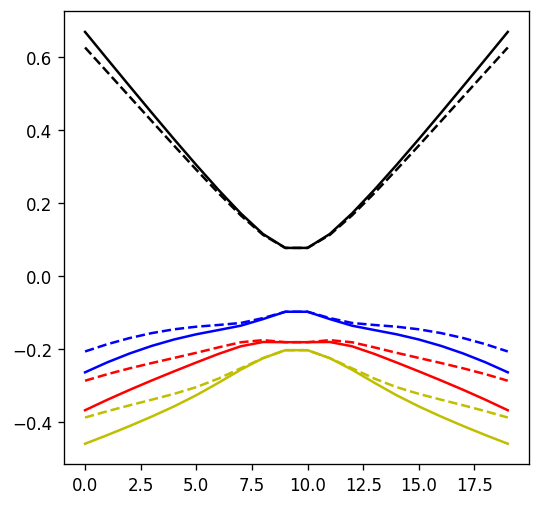

In [12]:
plt.figure(figsize = (5, 5), dpi = 120)
plt.plot(earr[:, int(size / 2), 246], 'k-')
plt.plot(earr[:, int(size / 2), 244], 'b-')
plt.plot(earr[:, int(size / 2), 242], 'r-')
plt.plot(earr[:, int(size / 2), 240], 'y-')
plt.plot(earr[int(size / 2), :, 246], 'k--')
plt.plot(earr[int(size / 2), :, 244], 'b--')
plt.plot(earr[int(size / 2), :, 242], 'r--')
plt.plot(earr[int(size / 2), :, 240], 'y--')

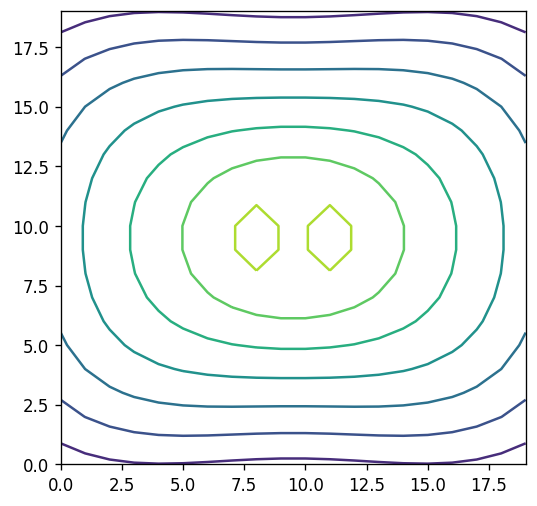

In [13]:
plt.figure(figsize = (5, 5), dpi = 120)
plt.contour(earr[:, :, 243], antialiased = True)

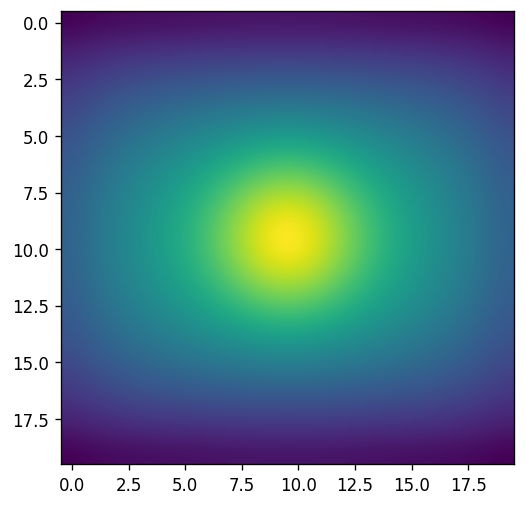

In [14]:
plt.figure(figsize = (5, 5), dpi = 120)
plt.imshow(earr[:, :, 240], interpolation = 'bicubic')